## 1) k-Means on a randomly generated dataset

* Keep 6000 random points \\
* The number of centers to generate should be initially 4 \\
* The standard deviation of the clusters should be 0.9 \\

a) Display the scatter plot of the randomly generated data.

b) Initialize the KMeans model and display the plot after k-means clustering.

c) Try to cluster the above random dataset into 3 clusters. and display the plot after clustering.


Ques-  What is the optimal number of clusters? Use appropriate method/methods to find optimal number of clusters.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


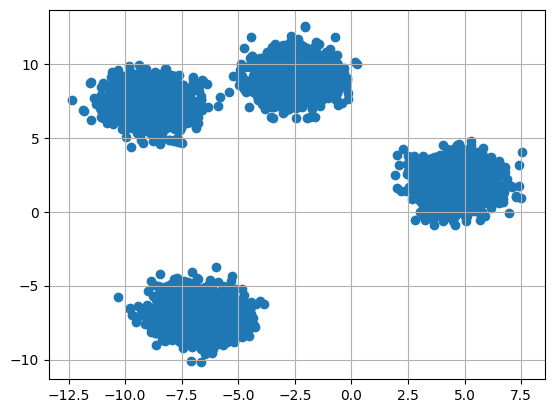

In [5]:
n_samples = 6000
n_features = 2
centers = 4
cluster_std = 0.9

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [9]:
k = 4

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []},
 3: {'center': array([-1.33144319, -0.43023013]), 'points': []}}

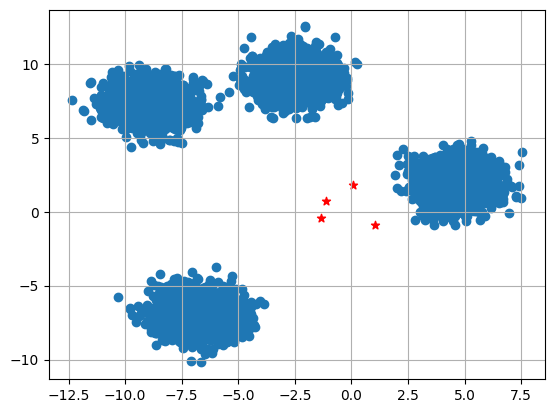

In [10]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [11]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))


In [12]:
#Implementing E step 
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters
        
#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters


In [20]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred   


In [21]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


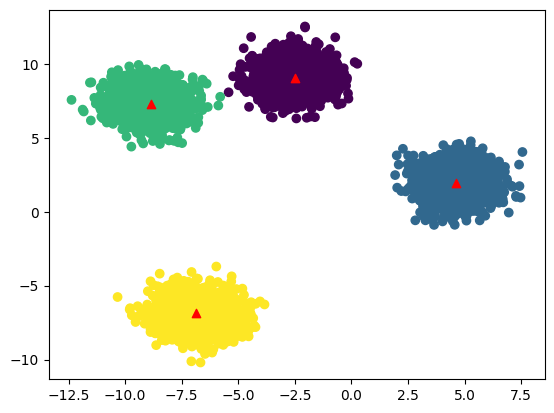

In [22]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


##c

In [26]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

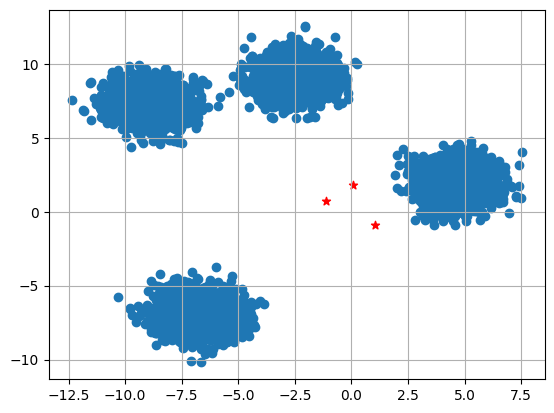

In [27]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [28]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


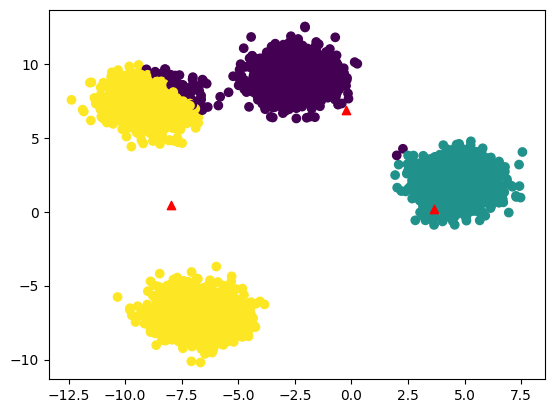

In [30]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [38]:
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)

In [39]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)


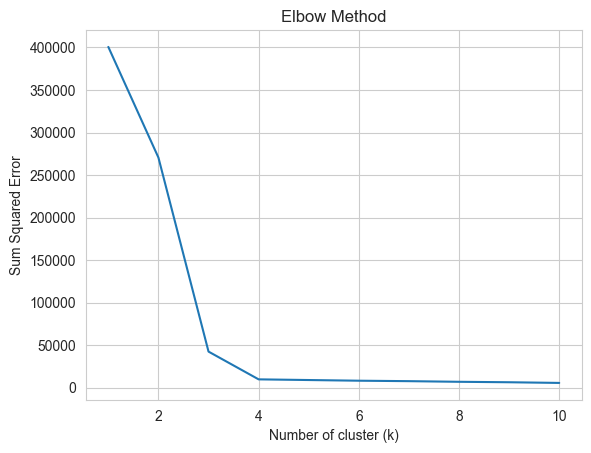

In [40]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')

plt.show()


## 2) k-Means on country-continent dataset

a) Read the dataset from the CSV file.

b) Get the unique continents from the dataset.

c) Map text data to numbers.

d) Run the k-means algorithm with the number of continents clusters.

e) Plot the results.

Ques- Compare the results with different number of clusters. What do you observe?

In [56]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
 
# read the csv dataset
data = pd.read_csv('countries_continents.csv', encoding='latin-1')
X, y = data.values, data.columns.values
 
print("continents: ")
continents = {e: i for i, e in enumerate(np.unique(X[:, 3]))}
print(continents)
 
# map data to numbers
X[:, 3] = np.vectorize(continents.__getitem__)(X[:, 3])
X = X[:, 1: np.size(X, 1)-1]
print(X)

continents: 
{'Africa': 0, 'Antarctica': 1, 'Asia': 2, 'Europe': 3, 'North America': 4, 'Oceania': 5, 'Seven seas (open ocean)': 6, 'South America': 7}
[[-69.98267711 12.52088038]
 [66.00473366 33.83523073]
 [17.53736768 -12.29336054]
 [-63.06498927 18.2239595]
 [20.04983396 41.14244989]
 [19.95328768 60.21488688]
 [1.56054378 42.54229102]
 [54.3001671 23.90528188]
 [-65.17980692 -35.3813488]
 [44.92993276 40.28952569]
 [-170.7180258 -14.30445997]
 [19.92108951 -80.50857913]
 [123.5838379 -12.42993164]
 [69.22666758 -49.24895485]
 [-61.79469343 17.2774996]
 [134.4910001 -25.73288704]
 [14.1264761 47.58549439]
 [47.54599879 40.28827235]
 [29.87512156 -3.35939666]
 [4.64065114 50.63981576]
 [2.32785254 9.6417597]
 [-1.75456601 12.26953846]
 [90.23812743 23.86731158]
 [25.21552909 42.76890318]
 [50.54196932 26.04205135]
 [-98.30777028 61.36206324]
 [-76.62843038 24.29036702]
 [17.76876733 44.17450125]
 [-62.84067779 17.89880451]
 [28.03209307 53.53131377]
 [-88.71010486 17.20027509]
 [-64

continents: 
{'Africa': 0, 'Antarctica': 1, 'Asia': 2, 'Europe': 3, 'North America': 4, 'Oceania': 5, 'Seven seas (open ocean)': 6, 'South America': 7}
cluster labels: 
[0 1 3 0 2 2 2 1 0 1 5 3 4 3 0 6 2 1 3 2 2 2 4 2 1 0 0 2 0 2 0 0 0 0 0 4 4
 3 3 2 0 4 2 3 3 3 5 0 3 2 0 0 0 0 1 1 2 2 1 0 2 0 2 0 1 1 2 2 1 2 6 0 2 2
 6 3 2 1 2 2 2 2 2 3 2 0 2 0 4 0 4 3 0 2 0 2 4 2 1 4 1 2 1 1 2 1 2 0 2 1 4
 1 1 3 1 4 0 0 4 2 1 4 1 2 2 0 2 1 3 2 2 2 4 0 2 2 2 3 1 0 6 2 2 2 4 2 4 4
 3 2 0 3 3 4 3 6 2 6 2 0 5 2 2 1 6 6 1 1 0 5 0 4 4 6 2 0 4 2 0 1 5 1 2 4 3
 2 1 1 3 2 4 0 3 6 2 0 2 1 1 0 2 3 0 2 2 2 3 0 3 1 0 2 2 4 1 1 4 5 0 2 1 4
 3 3 2 0 0 1 2 0 0 0 0 4 6 5 5 1 3 3 3]
cluster centers
[[ -69.69558678    9.13206396]
 [  51.99292319   27.06113662]
 [   6.82194037   39.39586484]
 [  29.78353845  -14.46686419]
 [ 114.28557305   18.04467747]
 [-162.24003412  -17.71618937]
 [ 160.73641421  -13.90902112]]
cluster labels
[0 1 3 0 2 2 2 1 0 1 5 3 4 3 0 6 2 1 3 2 2 2 4 2 1 0 0 2 0 2 0 0 0 0 0 4 4
 3 3 2 0 4 2 3 3 

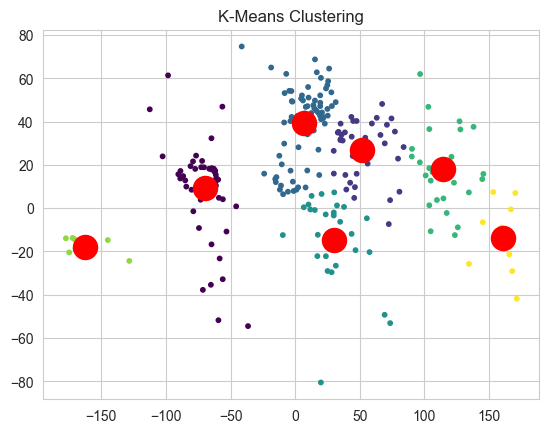

In [63]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the csv dataset
data = pd.read_csv('countries_continents.csv', encoding='latin-1')
X, head = data.values, data.columns.values

print("continents: ")
continents = {e: i for i, e in enumerate(np.unique(X[:, 3]))}
print(continents)

# Map data to numbers
X[:, 3] = np.vectorize(continents.__getitem__)(X[:, 3])
X = X[:, 1: np.size(X, 1)-1]

# Run K-Means clustering algorithm
kmeans = KMeans(n_clusters=7, init="k-means++")
kmeans.fit(X)
clusters = kmeans.predict(X)

print("cluster labels: ")
print(clusters)

# Show the assigned cluster centers (centroids)
print("cluster centers")
centroids = kmeans.cluster_centers_
print(centroids)

# Show the labels assigned for each data point
print("cluster labels")
print(kmeans.labels_)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.title('K-Means Clustering')
plt.show()


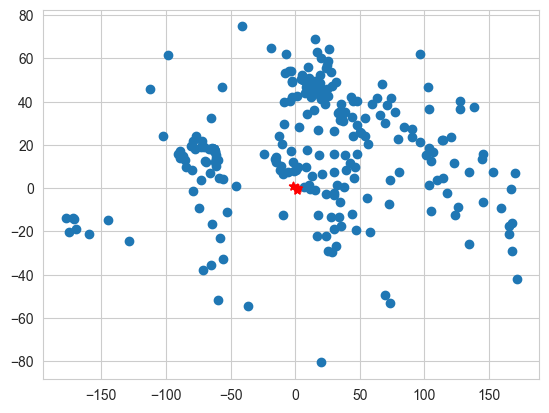

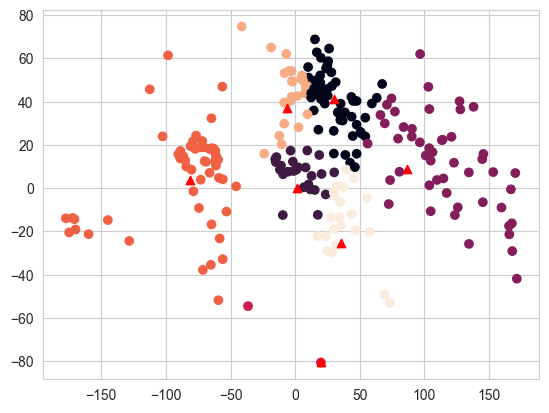

In [67]:
k = 7

clusters = {}
for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


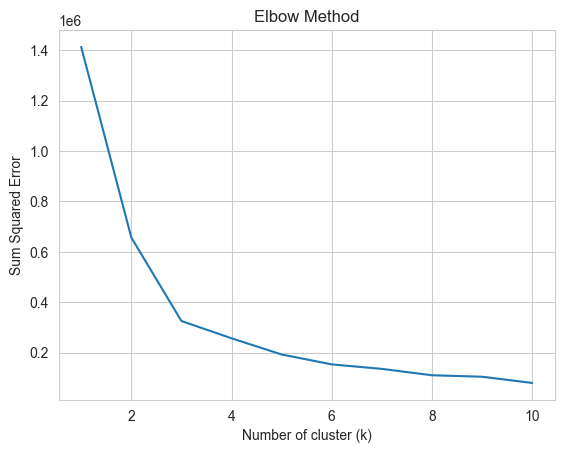

In [62]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')

plt.show()
